# Wish - Summer Clothing Sale Predictions

Background: Wish is an eCommerce website. The platform keeps track of ratings, merchant ratings, and other factors as they relate to product listings. It is important to determine what drives unit sales for products beyond factors such as ratings. The dataset involved in this project solely contained Summer Clothing. Thus, I set out to model unit sales as they related to variables associated with each product.

The dataset for this project can be found at:

https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish

The purpose of this notebook is to analyze the driving factors behind Wish Summer Clothing Unit sales. I used Microsoft Azure SQL to organize the data prior to any analysis done here. I will include the SQL code in each section of the project to show how this organization was done. 


There are 3 parts of this project.

1. Creating correlation table to understand which quantitative values had strongest correlations.

2. Doing a Multilinear Regression and a Polynomial Regression to see if I can create a model that will determine unit sales based on multiple variables.

3. Understanding how clothing color can affect sales.

# Step 1: Correlation Table

<b> Why: </b> I am creating a correlation table to see which factors are related to unit sales. This should offer an informative answer as to what future decisions should be made regarding sales strategy.

<b> How: </b> I will use Matplotlib, Scikit, and Pandas to clean the data and create a correlation table.

# Associated SQL

select title, units_sold, price, (retail_price - price) discount, uses_ad_boosts, rating, merchant_rating from summer-products

<b> A: Import Dataset and Libraries </b>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import statsmodels.api as sm

In [2]:
df = pd.read_csv('/Users/naasirhaleem/Desktop/Kaggle Projects/Wish/intermediate_csvs/Correlation/wishcorrelation.csv')

In [3]:
df.head()

,title,units_sold,price,discount,uses_ad_boosts,rating,merchant_rating
0,2020 Summer Vintage Flamingo Print Pajamas Se...,100,16.00,-2.00,0,3.76,4.128521
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,20000,8.00,14.00,1,3.45,3.899673
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,100,8.00,35.00,0,3.57,3.989831
3,Hot Summer Cool T-shirt pour les femmes Mode T...,5000,8.00,0.00,1,4.03,4.020435
4,Femmes Shorts d'été à lacets taille élastique ...,100,2.72,0.28,1,3.10,4.001588


<b> B: Visualize Units solds as they relate to Price </b>

In [ ]:
sns.regplot(x = "price", y = "units_sold", data = df)

<b> Note: Seems like weak negative correlation which would make sense but need to actually visualize it </b>

In [ ]:
df.corr()

<b> Note: It does not appear that any of these factors have a strong effect on units sold. Lets move on to the multilinear regression and polynomial regression. </b>

# Step 2: Create Multilinear Regression and Polynomial Regression
<b> Why: </b> I am performing multilinear regression and polynomial regression in order to create a model that will reliably predict units sold based on these factors. 

<b> How: </b> Going to use sklearn module

# Associated SQL
<b> MLR and PR 1:</b> select title, units_sold, price, (retail_price - price) discount, uses_ad_boosts, rating_count, merchant_rating_count, rating, merchant_rating, rating_five_count,product_variation_inventory, shipping_option_price, countries_shipped_to, has_urgency_banner from summer-products

<b> MLR and PR 2: </b>  select units_sold, (retail_price - price) discount, uses_ad_boosts, rating_count, merchant_rating_count, product_variation_inventory,  has_urgency_banner from summer-products

<b> A: Initiate Linear Regression </b>

In [15]:
lm = LinearRegression()

<b> A1: Want to test against merchant rating to see if that yields anything </b>

In [ ]:
lm.fit(df[['merchant_rating']],df['units_sold'])

In [ ]:
lm.score(df[['merchant_rating']],df['units_sold'])

<b> Note: R^2 here is about 2% so not terribly interesting since only 2% of data is being explained by merchant rating </b>

<b> B: Group all of factors </b>

In [ ]:
Z = df[['price','discount','uses_ad_boosts','rating','merchant_rating']]

<b> C: Run Regression </b>

In [ ]:
lm.fit(Z, df['units_sold'])

In [ ]:
a = lm.intercept_

In [ ]:
b = lm.coef_

In [ ]:
lm.fit(Z, df['units_sold'])

In [ ]:
c = lm.score(Z, df['units_sold'])

In [ ]:
print('Model is:',a,'+',b[0],'*price +',b[1],'*discount +',b[2],'*uses_ad_boosts +',b[3],'*rating +',b[4],'*merchant_rating')
print('R^2 is',c )

The model is shown here but my R^2 is extremely low. We'll see if a polynomial regression will work better. If not, then there may be more data cutting required.

<b> A: Inititate Pipeline and Polynomial Regression </b>

In [12]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [13]:
Z_pr=pr.fit_transform(Z)

NameError: name 'Z' is not defined

In [14]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
pipe=Pipeline(Input)
pipe

In [ ]:
y = df['units_sold']

In [ ]:
pipe.fit(Z,y)

<b> B: Run Regression </b>

In [ ]:
ypipe=pipe.predict(Z)
ypipe

<b> C: Check R^2 </b>

In [ ]:
pipe.score(Z,y)

<b> Note: This R^2 accounts for more of the data than before so a polynomial regression will help. </b>

<b> E: Read in another dataset with more factors passed in </b>

In [20]:
dff = pd.read_csv('/Users/naasirhaleem/Desktop/Kaggle Projects/Wish/intermediate_csvs/Correlation/wishcorrelation2.csv')

<b> Note: Have to replace any NULLS so that they do not affect regressions </b>

In [21]:
dff["has_urgency_banner"].replace(np.nan,0, inplace = True)
dff["rating_five_count"].replace(np.nan,0,inplace = True)

In [ ]:
dff.describe()

<b> E: Correlation Table </b>

In [ ]:
dff.corr()

<b> Note: Very strong correlation between rating count and units sold. This is obvious because intuitively the more units that are sold, the greater the number of reviews. </b>

In [ ]:
Z = dff[['price', 'discount', 'uses_ad_boosts', 'rating_count', 'merchant_rating_count','rating', 'merchant_rating', 'rating_five_count','product_variation_inventory', 'shipping_option_price', 'countries_shipped_to', 'has_urgency_banner']]

<b> F: Multilinear Regression II </b>

In [ ]:
lm.fit(Z,a)

In [ ]:
lm.score(Z,a)

<b> Note: Doing MLR barely increased our R^2 but it did increase it nevertheless. </b>

<b> G: OLS Table (Just wanted to see whether my p-values are out of whack)</b>

In [ ]:
X = Z
y = a
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

<b> Note: As we can see from above there is a warning that there is a multicollinearity problem. I already knew this, again because it stands to reason that rating_count, merchant_rating_count, and rating_five_count will all naturally increase as the units shipped increases. </b>

<b> What's more interesting </b> is that there are a few variables that are statistically significant here that were not quite that obvious before.

These variables are:

Discount

Uses Ad Boosts

Product Variation Inventory

Has Urgency Banner

<b> My interpretation: </b> I should conduct a MLR and Polynomial Regression again and this time only include these values in addition to the rating counts

<b> H: Multilinear Regression III </b>

In [22]:
ZZ = dff[['discount', 'uses_ad_boosts', 'rating_count', 'merchant_rating_count','product_variation_inventory','has_urgency_banner']]

In [23]:
aa = dff['units_sold']

In [24]:
lm.fit(ZZ,aa)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
lm.score(ZZ,aa)

0.813156315814829

In [26]:
a = lm.intercept_
b = lm.coef_

In [27]:
print('Model is:',a,' + discount*',b[0],' + uses_ad_boosts*',b[1],' + rating_count*',b[2],' + merchant_rating_count*',b[3],' + product_variation_inventory*',b[4],' + has_urgency_banner*',b[5])
print('R^2 is',lm.score(ZZ,aa))

Model is: 328.41944350052563  + discount* -11.382388703555067  + uses_ad_boosts* 443.4536185721469  + rating_count* 4.1932176580775  + merchant_rating_count* 0.005062329140738299  + product_variation_inventory* 7.572628639902614  + has_urgency_banner* -419.8878762214729
R^2 is 0.813156315814829


<b> Note: Also want to visualize the data through a distribution plot </b>

In [ ]:
yhat = lm.predict(ZZ)

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(dff['units_sold'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Proportion of Summer Clothes')

plt.show()

<b> I: Polynomial Regression II </b>

In [28]:
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(ZZ)
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
aa = df['units_sold']

In [29]:
pipe.fit(ZZ,aa)

/Users/naasirhaleem/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/naasirhaleem/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [30]:
ypipe=pipe.predict(ZZ)

/Users/naasirhaleem/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [31]:
pipe.score(ZZ,aa)

/Users/naasirhaleem/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.8394708588418742

<b> Note: The Polynomial Regression actually fits this Regression better so I will stick with it </b>

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(dff['units_sold'], hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Proportion of Summer Clothes')

plt.show()

<b> The Coefficients for the Model are as follows. Still trying to figure out how to write the whole thing. </b>

In [32]:
b1 = ypipe[0]
b2 = ypipe[1]
b3 = ypipe[2]
b4 = ypipe[3]
b5 = ypipe[4]
b6 = ypipe[5]

In [33]:

print('discount:',b1)
print('uses_ad_boosts:',b2)
print('rating_count:',b3)
print('merchant_rating_count:',b4)
print('product_variation_inventory:',b5)
print('has_urgency_banner:',b6)

discount: 1255.25
uses_ad_boosts: 26910.875
rating_count: -5.0
merchant_rating_count: 3408.4375
product_variation_inventory: 377.125
has_urgency_banner: 129.6875


# Step 3: Binning and Measuring Effect of Color of Clothes on Sales

<b> Why: </b> I am going to separate out clothes by color to determine whether there is a consumer preference for a certain color. Then I will run a simple regression to see if that color is significantly preferred in comparison to other colors.

<b> How: </b> I will do this by first going into SQL and slicing a dataset in order to get the 10 most common colors. Then I will use various binning techniques in Jupyter. I will also see what type of plots will be helpful in determining this. 

# Associated SQL

<b>Understanding which colors were top 10 in sales: </b>

select TOP 10 product_color, count(product_color)product_color_count,sum(units_sold) color_units_sold, sum(price) color_price from summer-products
group by product_color
order by product_color_count desc

<b>Color Binning: </b>

Alter Table dbo.summer-products ADD ColorBin int GO

Update summer-products SET summer-products.ColorBin = case
When product_color = 'black' then 1
When product_color = 'white' then 2
When product_color = 'yellow' then 3
When product_color = 'pink' then 4
When product_color = 'blue' then 5
When product_color = 'red' then 6
When product_color = 'green' then 7
When product_color = 'grey' then 8
When product_color = 'purple' then 9
When product_color = 'armygreen' then 10
else 11

End


<b>Understand which colors have highest average number of units sold: </b>

select ColorBin, sum(units_sold) color_units_sold, avg(units_sold) color_average_sold from summer-products
Where ColorBin != 11
Group by ColorBin
Order by color_average_sold desc


Note: We can see here that the top 5 in terms of average are purple, grey, black, white, and blue
I'll make dummies of those 5 to see what their effects are on prices

<b> Creating Dummies of top average selling colors: </b>

Alter Table [dbo].[summer-products]
ADD is_purple int
ADD is_grey int
ADD is_black int
ADD is_white int
ADD is_blue int

GO

Update [summer-products] SET [summer-products].[is_grey] = case
When ColorBin = 8 then 1
else 0
END

Update [summer-products] SET [summer-products].[is_black] = case
When ColorBin = 1 then 1
else 0
END

Update [summer-products] SET [summer-products].[is_white] = case
When ColorBin = 2 then 1
else 0
END

Update [summer-products] SET [summer-products].[is_blue] = case
When ColorBin = 5 then 1
else 0
END

Update [summer-products] SET [summer-products].[is_purple] = case
When ColorBin = 9 then 1
else 0
END

select units_sold, (retail_price - price) discount, uses_ad_boosts, rating_count, merchant_rating_count, 
product_variation_inventory,  has_urgency_banner, product_color, ColorBin, is_black, is_grey, is_purple, is_white, is_blue from summer-products    

# Process

<b> A: Read in csv </b>

In [34]:
cf = pd.read_csv('/Users/naasirhaleem/Desktop/Kaggle Projects/Wish/intermediate_csvs/Color/Color2.csv')

In [35]:
cf = cf[cf['ColorBin'] != 11]

In [36]:
cf.describe()

,units_sold,price,discount,uses_ad_boosts,rating_count,merchant_rating_count,rating,merchant_rating,rating_five_count,product_variation_inventory,shipping_option_price,countries_shipped_to,has_urgency_banner,ColorBin
count,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1.207000e+03,1207.000000,1207.000000,1172.000000,1207.000000,1207.000000,1207.000000,368.0,1207.000000
mean,4130.657829,8.162974,14.933132,0.428335,867.460646,2.685009e+04,3.812461,4.026353,431.831058,33.154101,2.301574,40.741508,1.0,3.800331
std,8598.938507,3.624832,30.049323,0.495043,1963.340327,8.214522e+04,0.530819,0.206565,984.081239,21.341559,0.946420,20.233204,0.0,2.684777
min,1.000000,1.000000,-3.000000,0.000000,0.000000,3.000000e+00,1.000000,2.333333,0.000000,1.000000,1.000000,6.000000,1.0,1.000000
25%,100.000000,5.790000,-1.000000,0.000000,22.500000,1.945500e+03,3.530000,3.914894,11.000000,6.000000,2.000000,32.000000,1.0,1.000000
50%,1000.000000,8.000000,0.190000,0.000000,144.000000,8.166000e+03,3.830000,4.039495,78.000000,50.000000,2.000000,40.000000,1.0,3.000000
75%,5000.000000,11.000000,17.000000,1.000000,856.000000,2.515750e+04,4.110000,4.156691,397.000000,50.000000,3.000000,43.000000,1.0,6.000000
max,100000.000000,26.000000,244.000000,1.000000,20744.000000,2.174765e+06,5.000000,4.577519,11548.000000,50.000000,7.000000,140.000000,1.0,10.000000


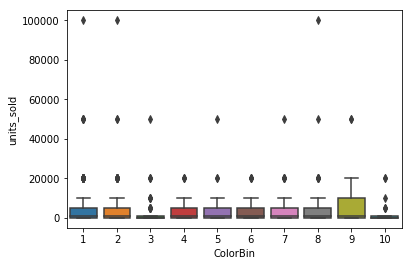

In [37]:
sns.boxplot(x = "ColorBin", y = "units_sold", data = cf)

In [38]:
pivot = cf.pivot_table(index = 'ColorBin', values = 'units_sold', aggfunc = 'sum')

In [39]:
pivot

,units_sold
ColorBin,
1,1589313
2,1148227
3,222212
4,264500
5,326238
6,295300
7,291543
8,436190
9,338480


<b> Note: Generally understand the breakup of the different colors. Now I want to see if there are significant differences. </b>

In [40]:
cf1 = pd.read_csv('/Users/naasirhaleem/Desktop/Kaggle Projects/Wish/intermediate_csvs/Color/Color4.csv')

In [ ]:
cf1.head()

In [ ]:
cf1.corr()

<b> B: Run OLS to determine if there is true preference that leads to unit sales </b>

In [41]:
Z = cf1[['is_black','is_blue','is_white','is_grey','is_purple']]
a = cf1['units_sold']

In [42]:
X = Z
y = a
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.382
Date:                Thu, 01 Oct 2020   Prob (F-statistic):             0.0365
Time:                        14:17:30   Log-Likelihood:                -16609.
No. Observations:                1573   AIC:                         3.323e+04
Df Residuals:                    1567   BIC:                         3.326e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3795.1804    332.794     11.404      0.0

<b> Note: This regression clearly shows us that the following colors do have a significant difference in sales: </b>

<b> Black </b> 

<b> Grey </b>

<b> Purple </b>

This would lead me to predict that these would likely be the top performing colors in the next year of Summer Sales.

# Conclusions
1: Correlation Table
    
    a. From the correlation table with the following list of factors: price, discount, uses ad boosts, rating, and merchant rating, I can see that none of these factors had a particularly strong correlation with units sold. 
    
2: Multilinear and Polynomial Regressions
    
    a: After doing an OLS regression was able to narrow down the variables to: discount, uses ad boosts, product variation inventory, has urgency banner. Used rating count as well.
    
    b: Produced the following model after doing Multilinear Regression:
    
        Model is: 328.41944350052563  + discount* -11.382388703555067  + uses_ad_boosts* 443.4536185721469  +               rating_count* 4.1932176580775  + merchant_rating_count* 0.005062329140738299  +  product_variation_inventory* 7.572628639902614  + has_urgency_banner* -419.8878762214729

        R^2 is 0.813156315814829 (ie 81.3% of data explained by MLR)
    
       c: Produced the following coefficients after doing Polynomial Regression (Still trying to understand how to find    the intercepts):
   
       Coefficients: discount: 1255.25
                 uses_ad_boosts: 26910.875
                 rating_count: -5.0
                 merchant_rating_count: 3408.4375
                 product_variation_inventory: 377.125
                 has_urgency_banner: 129.6875
        R^2 is 0.8394708588418742 (ie 83.9% of data explained by Polynomial Regression)
    
3: Generally Predicting Unit Sales of Summer Clothes in 2021
    
    a: After creating a pivot table I was able to determine that in terms of sales, the top 5 colors were               represented thusly:
        
        1. Black (1589313)
        2. White (1148227)
        3. Grey (436190)
        4. Purple (338480)
        5. Blue (326238)
        
     b: I then determined that there was a significant positive difference in sales related to 3 colors. These          colors and their coefficients were the following:
        
        1. Purple (2591.23)
        2. Grey (2348.34)
        3. Black (1415.68)
        
        This finding does not mean that color choice itself is a significant driver of unit sales. However, this           does mean that all else being equal these colors will perform significantly better than their counterparts.         Thus, we can expect that on average purple summer clothes will have higher average sales than all other             clothes in 2021. We can also expect that by, pure volume and by average performance, black clothes will             also sell at a higher rate than other clothes. 
        
     
   
   
    
    